### Clustering

Clustering is a group of data points or objects in a dataset that are similar to other objects in the group
and dis-similar objects in other groups

#### Apply clustering for Iris dataset

In [1]:
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [3]:
import pandas as pd

In [5]:
df = pd.DataFrame(data['data'])
df.columns = data['feature_names']

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


**we just visualize the data**

In [7]:
import matplotlib.pyplot as plt

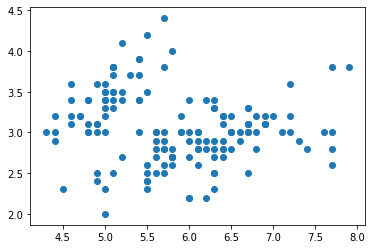

In [8]:
plt.figure()
plt.scatter(df['sepal length (cm)'] , df['sepal width (cm)'])
plt.show()

**Cluster the the iris dataset by using sepal length (cm) and sepal width (cm)**

In [9]:
X = df[['sepal length (cm)','sepal width (cm)']]

**split data for training and testing**

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test = train_test_split(X,train_size=0.7)

In [12]:
X_train.shape

(105, 2)

In [13]:
X_test.shape

(45, 2)

**K-Means algorithm for Clustering**

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmModel = KMeans(n_clusters=3)
kmModel.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
y_predict = kmModel.predict(X_test)

In [18]:
X_test.head()

,sepal length (cm),sepal width (cm)
95,5.7,3.0
0,5.1,3.5
32,5.2,4.1
58,6.6,2.9
147,6.5,3.0


In [20]:
y_predict[:5]

array([2, 1, 1, 0, 0], dtype=int32)

**Properties for clutstering**

1. All data points in a cluster similar to each other

2. The data point from different clusters should be different as possible

**Identify the the inertia for different k and where the elbow occur that is best k**

In [24]:
range_of_k = range(1,7)
myList = [] # to store inertia for each k
for k in range_of_k:
    kmModel = KMeans(n_clusters=k)
    kmModel.fit(X)
    inertia = kmModel.inertia_
    print('{}inertia for k={}'.format(inertia,k))
    myList.append(inertia)

130.47526666666667inertia for k=1
58.20409278906671inertia for k=2
37.05070212765958inertia for k=3
28.034982153246226inertia for k=4
20.996847717323334inertia for k=5
17.41486978468686inertia for k=6


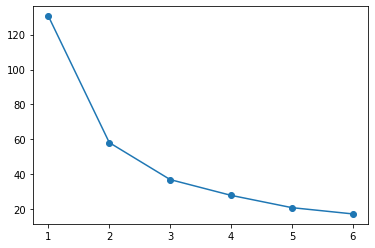

In [26]:
plt.figure()
plt.plot(range_of_k,myList,marker='o')
plt.show()

**elbow curve occur between 3 and 4**

#### Applying kMeans clustering for wine quality dataset

**1.Get the data**

download whine quality from https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

In [38]:
df_white = pd.read_csv('winequality-white.csv',sep=";")
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [40]:
df_red = pd.read_csv('winequality-red.csv',sep=";")
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [41]:
df_white.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [42]:
df_red.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

**combine two datasets**

In [48]:
df = pd.concat([df_red,df_white])

In [49]:
df.shape

(6497, 12)

In [50]:
df_red.shape

(1599, 12)

In [51]:
df_white.shape

(4898, 12)

In [52]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [54]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [55]:
X = df.drop('quality',axis=1)
X.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8


In [56]:
from sklearn.cluster import KMeans

**Identify good number of clusters**

In [57]:
range_cluster_number = range(1,20)
myList = []
for k in range_cluster_number:
    kmModel = KMeans(n_clusters=k)
    kmModel.fit(X)
    inertia = kmModel.inertia_
    myList.append(inertia)

In [59]:
%matplotlib notebook

<IPython.core.display.Javascript object>


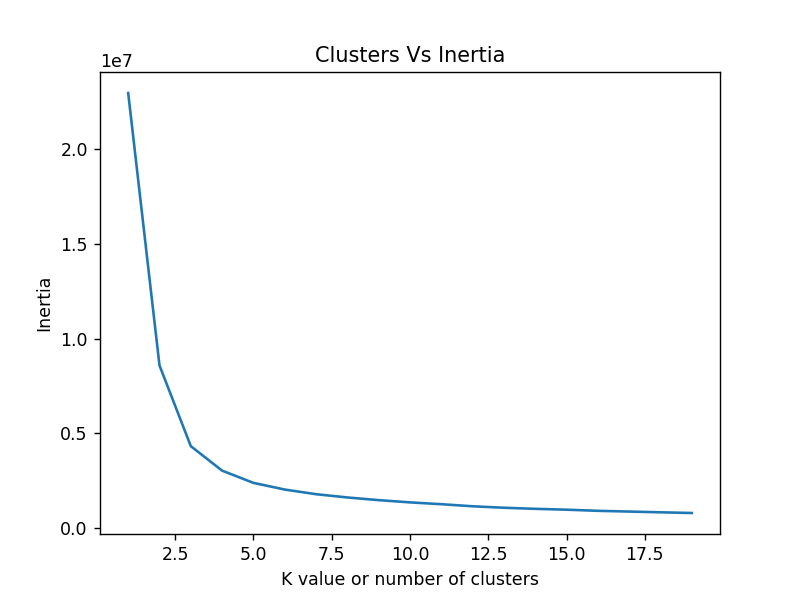

In [60]:
plt.figure()
plt.plot(range_cluster_number,myList)
plt.xlabel('K value or number of clusters')
plt.ylabel('Inertia')
plt.title('Clusters Vs Inertia')
plt.show()